## BLE Lab Testing Analysis

- Verify the accuracy of your battery level measurement for 0-3.6 V. As you can see below, the graph is almost perfectly linear and the R^2 value is extremely close to one so we can conclude that our battery percentages are accurately reading from the ADC channel.

In [3]:
# load the data set of calculated brightness from applied voltage
import pandas as pd
data = pd.read_csv("battery.csv")
data.head(21)

Input Voltage  Battery Percentage (%)
0             0.5                      12
1             0.5                      11
2             0.5                      12
3             1.0                      25
4             1.0                      25
5             1.0                      25
6             1.5                      37
7             1.5                      37
8             1.5                      37
9             2.0                      49
10            2.0                      49
11            2.0                      49
12            2.5                      60
13            2.5                      60
14            2.5                      60
15            3.0                      83
16            3.0                      72
17            3.0                      77
18            3.3                      79
19            3.3                      79
20            3.3                      79

 Battery R squared Value: 0.98976670452698


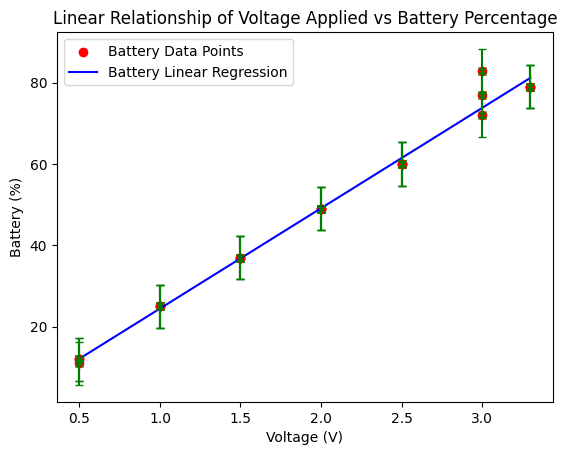

In [5]:
## plot the voltage vs blink rate

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem

voltage =data['Input Voltage'].to_numpy()
battery = data["Battery Percentage (%)"].to_numpy()

#on time data in green
plt.scatter(voltage, battery, marker='o', color='red', label="Battery Data Points" )
plt.xlabel('Voltage (V)')
plt.ylabel('Battery (%)')

# on time linear regression in red
battery_slope,battery_intercept,battery_rvalue,battery_pvalue,battery_std_err = linregress(voltage,battery)
battery_linear_fit = battery_slope * voltage  + battery_intercept
battery_r_squared = battery_rvalue**2
plt.plot(voltage,battery_linear_fit, color ='blue',label="Battery Linear Regression")

#on time standard error of the mean
battery_error = sem(battery)
plt.errorbar(voltage,battery,yerr=battery_error,fmt="x", capsize=3, capthick=1, color='green')

plt.annotate("R^2 = {:.5f}".format(battery_r_squared),(0.2,9000))
plt.legend()
plt.title('Linear Relationship of Voltage Applied vs Battery Percentage')

print(f" Battery R squared Value: {battery_r_squared}")

- Using the function generator and the oscilloscope, make measurements varying the 100 and 500 Hz input signals linearly over their Vpp ranges, and measure the corresponding LED brightness output for each input. 
- How linear is the relationship between Vpp and PWM output?  Quantify this relationship with linear regressions and associated R2R^2R2 values.


In [24]:
# load the data set of calculated brightness from applied voltage
import pandas as pd
data1 = pd.read_csv("led_1.csv")
data1.head(15)

100 HZ  Led 1 Vpp  Brightness
0       10       0.88       10.69
1       10       0.91       10.74
2       10       0.99       10.89
3       20       1.13       11.14
4       20       1.15       11.18
5       20       1.40       11.63
6       30       1.57       11.95
7       30       1.80       12.36
8       30       1.72       12.22
9       40       2.39       13.43
10      40       2.43       13.51
11      40       2.51       13.65
12      50       3.59       15.61
13      50       3.88       16.15
14      50       3.62       15.67

 Brightness R squared Value: 0.9999955505687617


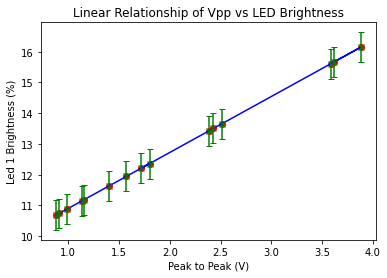

In [36]:
## plot the voltage vs blink rate

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import sem

voltage1 =data1['Led 1 Vpp'].to_numpy()
brightness1 = data1["Brightness"].to_numpy()

#on time data in green
plt.scatter(voltage1, brightness1, marker='o', color='red', label="Brightness Data Points" )
plt.xlabel('Peak to Peak (V)')
plt.ylabel('Led 1 Brightness (%)')

# on time linear regression in red
brightness_slope,brightness_intercept,brightness_rvalue,brightness_pvalue,brighntess_std_err = linregress(voltage1,brightness1)
brightness_linear_fit = brightness_slope * voltage  + brightness_intercept
brightness_r_squared = brightness_rvalue**2
plt.plot(voltage1,brightness_linear_fit, color ='blue',label="Brightness Linear Regression")

#on time standard error of the mean
brightness_error = sem(brightness1)
plt.errorbar(voltage1,brightness1,yerr=brightness_error,fmt="x", capsize=3, capthick=1, color='green')

plt.title('Linear Relationship of Vpp vs LED Brightness')

print(f" Brightness R squared Value: {brightness_r_squared}")


The above graph represents the relationship between our peak to peak voltage values and the calculated LED brightness. We expect this graph to be linear as we are scaling the brightness values using a linear equation. As demonstrated by the R^2 value close to 1, we can conclude that the relationship between Vpp and brightness is practically linear. 

We would expect to see a linear relationship and similar R^2 value for led2. The only difference being the higher Vpp values since we are operating at a higher frequency and scaling input voltages from 10 to 150 mV. For Led1, we were only scaling input voltages from 10-50 mV. 

- Demonstrate the safety feature of your device to cease function and blink LED3 when VBUS is HIGH.

In this video VBUS is disconnected. There is no error and the LED 3 is toggled off.

<video width = "640" height = "480"
       src = "vbus_disconnected.mov"
       controls>
</video>  

In this video, the VBUS is connected causing LED3 to flash and entrance into the VBUS Error State. In this state, we continuously monitor for the disconnection of VBUS and once disconnected, it returns to the idle state.

<video width = "640" height = "480"
       src = "vbus_connected.mov"
       controls>
</video>  

- If your device wasn't limited to 100 and 500 Hz inputs, what is the maximum input frequency that your device can support without aliasing?  Answer this question from a theoretical perspective and experimentally.

The Nyquist frequency is the highest frequency that the equipment of a given sample rate can reliably measure. 

According to the Nyquist theorem, the sampling frequency must be at least twice the maximum frequency of the input signal.

Since the sampling rate of our device is 200 samples per second, we must find the maximum input frequency without aliasing, so that we can use this theorem and divide 200 kHz by 2 to get 100 kHz. This means that our ADC input can support input frequencies up to 100 kHz without aliasing. 

If the sampling rate of our board was 200,000 samples per second the corresponding Nyquist frequency would be 100,000 cycles/second or 100 kHz.